In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [74]:
x,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [76]:
dummy_model_pred= [0 for _ in range(len(y_test))]

In [77]:
print(dummy_model_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [78]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [79]:
model_pred = model.predict_proba(x_test)

In [80]:
model_pred=model_pred[:,1]

In [81]:
# loooking at a positive outcome
model_pred


array([4.06216587e-02, 6.44713387e-01, 5.38732876e-01, 8.73110975e-01,
       6.01473192e-01, 4.10776509e-01, 9.28778254e-01, 2.49540657e-01,
       4.55954900e-02, 3.03859348e-02, 8.66127103e-01, 4.68208162e-01,
       8.27589590e-01, 3.21642984e-02, 7.69763188e-01, 3.85242976e-01,
       4.34908211e-01, 7.47088006e-03, 3.74204437e-01, 1.32724600e-02,
       1.51303330e-02, 9.58384731e-01, 1.79147874e-01, 9.73088788e-01,
       9.72450017e-01, 8.30650485e-01, 5.34671441e-01, 5.01917093e-02,
       1.01228908e-02, 9.78784950e-01, 9.39490691e-01, 9.03671822e-01,
       3.32370894e-02, 9.09948593e-01, 3.73692041e-01, 2.96964915e-01,
       2.37887250e-02, 8.71602104e-01, 1.16043537e-01, 8.72214801e-01,
       4.93934896e-01, 9.60635012e-01, 5.14355751e-01, 5.97329843e-01,
       4.50478630e-01, 9.29693017e-03, 1.02556098e-02, 7.03692587e-01,
       6.16181236e-03, 8.14349801e-01, 8.37087836e-01, 9.15811568e-01,
       9.54138995e-01, 8.88073827e-01, 1.89424774e-01, 6.54811331e-02,
      

In [82]:
dummy_model_roc = roc_auc_score(y_test,dummy_model_pred)
actual_model_roc = roc_auc_score(y_test,model_pred)

In [83]:
print(dummy_model_roc)
print(actual_model_roc)

0.5
0.9232456140350878


In [84]:
dummy_fpr,dummy_tpr ,_= roc_curve(y_test,dummy_model_pred)
model_fpr,model_tpr ,theresold= roc_curve(y_test,model_pred)

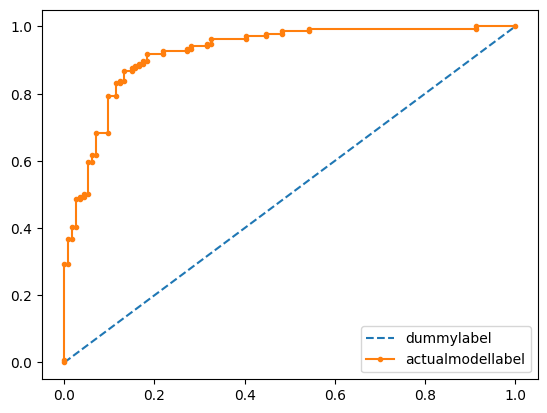

In [85]:

plt.plot(dummy_fpr,dummy_tpr,linestyle="--", label="dummylabel")
plt.plot(model_fpr,model_tpr,marker=".", label="actualmodellabel")



plt.legend()
plt.show()

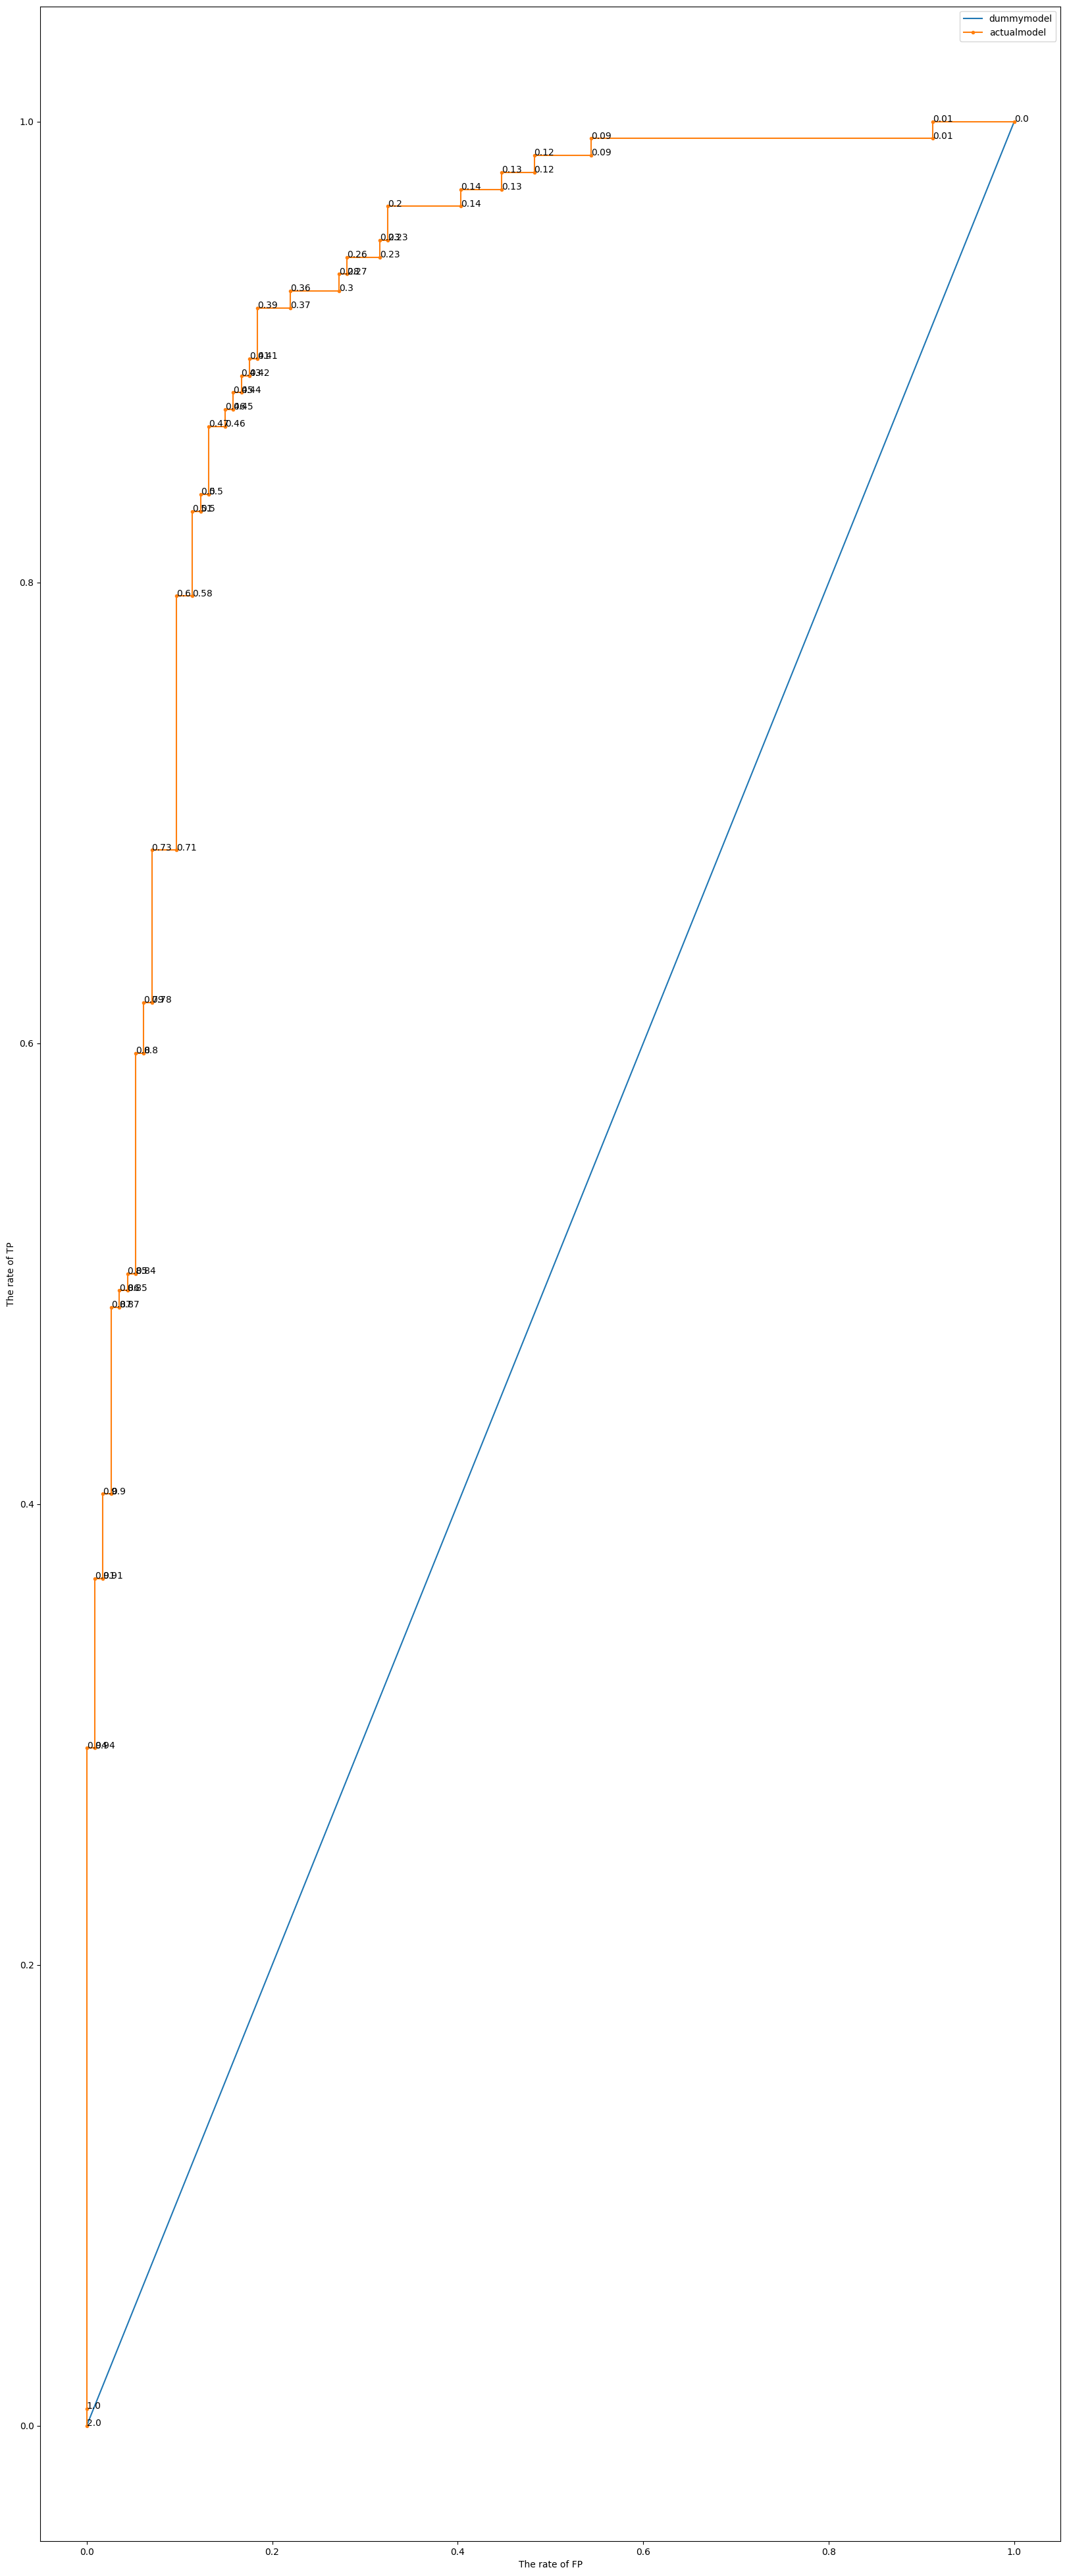

In [92]:
import numpy as np
fig = plt.figure(figsize=(20,50))
ax= fig.add_subplot(111)

plt.plot(dummy_fpr,dummy_tpr,linestyle="-", label="dummymodel")
plt.plot(model_fpr,model_tpr,marker=".", label="actualmodel")

for xyz in zip(model_fpr,model_tpr,theresold):
    ax.annotate(f'{np.round(xyz[2], 2)}', xy=(xyz[0], xyz[1]))

plt.xlabel("The rate of FP")
plt.ylabel("The rate of TP")
plt.legend()
plt.show()